<a href="https://colab.research.google.com/github/Sindhusworld/my_website/blob/main/SindhuChatbaot0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.chat.util import Chat, reflections
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime


In [ ]:
nltk.download('punkt')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:

# Define chatbot patterns and responses
patterns_responses = [
    (r'hi|hello|hey', ['Hello!', 'Hi there!', 'Hey! How can I help you?']),
    (r'what is your name?', ['I am a simple chatbot created to help you.']),
    (r'how are you?', ['I am doing great, thanks for asking! How about you?']),
    (r'I need help', ['Sure! What do you need help with?']),
    (r'bye|exit|quit', ['Goodbye! Have a great day!']),
    (r'(.*)', ['Sorry, I didn’t understand that. Can you ask something else?'])
]

# Create a chatbot using the defined patterns and responses
chatbot = Chat(patterns_responses, reflections)

In [ ]:
# Create an empty dataframe to log conversations
columns = ['timestamp', 'user_input', 'chatbot_response']
chat_log = pd.DataFrame(columns=columns)

# Function to log chat interactions
def log_chat(user_input, chatbot_response):
    timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    new_entry = pd.DataFrame([[timestamp, user_input, chatbot_response]], columns=columns)
    return pd.concat([chat_log, new_entry], ignore_index=True)


In [ ]:
print("Hello! I am your chatbot. Type 'bye' to exit.")

# Start chatting
while True:
    user_input = input("You: ")
    if user_input.lower() == 'bye':
        print("Chatbot: Goodbye! Have a great day!")
        break
    response = chatbot.respond(user_input)
    print("Chatbot:", response)

    # Log the conversation
    chat_log = log_chat(user_input, response)


Hello! I am your chatbot. Type 'bye' to exit.
You: hi
Chatbot: Hi there!
You: how are you
Chatbot: I am doing great, thanks for asking! How about you?
You: i am sindhu
Chatbot: Sorry, I didn’t understand that. Can you ask something else?
You: its my name
Chatbot: Sorry, I didn’t understand that. Can you ask something else?
You: whats todays time
Chatbot: Sorry, I didn’t understand that. Can you ask something else?
You: by
Chatbot: Sorry, I didn’t understand that. Can you ask something else?
You: i need help
Chatbot: Sure! What do you need help with?
You: may be with some code
Chatbot: Sorry, I didn’t understand that. Can you ask something else?
You: hello
Chatbot: Hi there!
You: exit
Chatbot: Goodbye! Have a great day!
You: bye
Chatbot: Goodbye! Have a great day!


In [ ]:
# Count how often each unique user input appears in the dataset
input_counts = chat_log['user_input'].value_counts()

# Display the top 5 most common user inputs
print(input_counts.head())


user_input
hi                   1
how are you          1
i am sindhu          1
its my name          1
whats todays time    1
Name: count, dtype: int64


In [ ]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    return score

# Example sentiment analysis
user_input = "I am feeling great!"
sentiment = analyze_sentiment(user_input)
print(sentiment)  # Output will be a dictionary with positive, negative, neutral scores


{'neg': 0.0, 'neu': 0.145, 'pos': 0.855, 'compound': 0.7088}


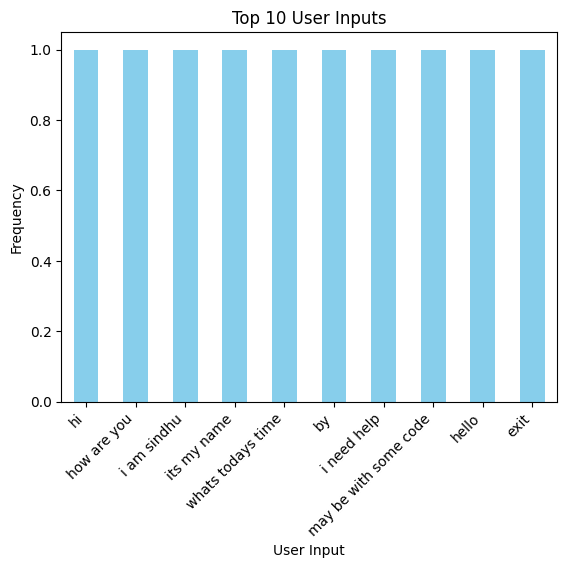

In [ ]:
# Plot top 10 most common user inputs
input_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 User Inputs')
plt.xlabel('User Input')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


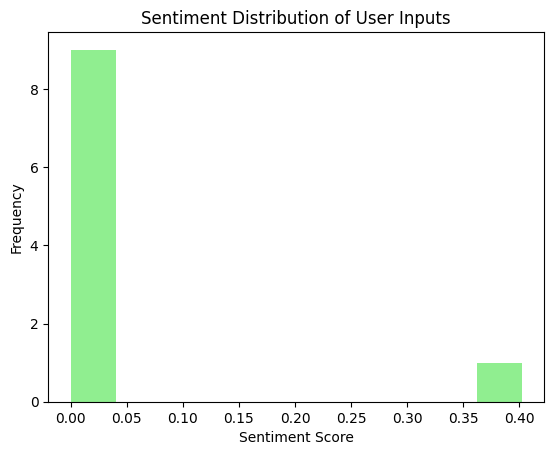

In [ ]:
# Calculate sentiment for all user inputs
sentiments = chat_log['user_input'].apply(lambda x: analyze_sentiment(x)['compound'])

# Create a sentiment distribution plot
plt.hist(sentiments, bins=10, color='lightgreen')
plt.title('Sentiment Distribution of User Inputs')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from IPython.display import HTML

# Example HTML content with output embedded (like tables or text)
html_content = """
<html>
  <head>
    <title>Chatbot Interaction Results</title>
  </head>
  <body>
    <h1>Chatbot Interaction Results</h1>
    <p>Here are the results from the chatbot interactions:</p>
    <table border="1">
      <tr><th>Timestamp</th><th>User Input</th><th>Chatbot Response</th></tr>
      <tr><td>2024-11-01 12:00:00</td><td>Hi</td><td>Hello!</td></tr>
      <tr><td>2024-11-01 12:05:00</td><td>What is your name?</td><td>I am a chatbot created to help you.</td></tr>
      <tr><td>2024-11-01 12:10:00</td><td>I need help</td><td>Sure! What do you need help with?</td></tr>
      <!-- Add other rows of results here -->
    </table>
    <br>
    <h2>Visual Output</h2>
    <img src="your_image_link_here.png" alt="Chatbot Interaction Graph">
  </body>
</html>
"""

# Save the HTML content to a file in a correct location
file_path = '/content/chatbot_output_page.html'
with open(file_path, 'w') as file:
    file.write(html_content)

# Provide a download link for the HTML page
HTML(f"<a href='{file_path}' download>Download the output page</a>")


In [ ]:
from IPython.display import HTML

# Example HTML content with output embedded (like tables or text)
html_content = """
<html>
  <head>
    <title>Chatbot Interaction Results</title>
  </head>
  <body>
    <h1>Chatbot Interaction Results</h1>
    <p>Here are the results from the chatbot interactions:</p>
    <table border="1">
      <tr><th>Timestamp</th><th>User Input</th><th>Chatbot Response</th></tr>
      <tr><td>2024-11-01 12:00:00</td><td>Hi</td><td>Hello!</td></tr>
      <tr><td>2024-11-01 12:05:00</td><td>What is your name?</td><td>I am a chatbot created to help you.</td></tr>
      <tr><td>2024-11-01 12:10:00</td><td>I need help</td><td>Sure! What do you need help with?</td></tr>
    </table>
    <br>
    <h2>Visual Output</h2>
    <img src="your_image_link_here.png" alt="Chatbot Interaction Graph">
  </body>
</html>
"""

# Save the HTML content to a file in the current directory
file_path = '/content/chatbot_output_page.html'
with open(file_path, 'w') as file:
    file.write(html_content)

# Provide a link for downloading the HTML file
HTML(f"<a href='{file_path}' download>Click here to download the HTML output</a>")


In [ ]:
# Example HTML content with output embedded (like tables or text)
html_content = """
<html>
  <head>
    <title>Chatbot Interaction Results</title>
  </head>
  <body>
    <h1>Chatbot Interaction Results</h1>
    <p>Here are the results from the chatbot interactions:</p>
    <table border="1">
      <tr><th>Timestamp</th><th>User Input</th><th>Chatbot Response</th></tr>
      <tr><td>2024-11-01 12:00:00</td><td>Hi</td><td>Hello!</td></tr>
      <tr><td>2024-11-01 12:05:00</td><td>What is your name?</td><td>I am a chatbot created to help you.</td></tr>
      <tr><td>2024-11-01 12:10:00</td><td>I need help</td><td>Sure! What do you need help with?</td></tr>
    </table>
    <br>
    <h2>Visual Output</h2>
    <img src="your_image_link_here.png" alt="Chatbot Interaction Graph">
  </body>
</html>
"""

# Save the HTML content to a file in Colab
file_path = '/content/chatbot_output_page.html'
with open(file_path, 'w') as file:
    file.write(html_content)

# Provide a download link
from IPython.display import HTML
HTML(f"<a href='{file_path}' download>Click here to download the HTML output</a>")
